# Analysis

In [1]:
from pyspark import SparkContext
import json
import utils
import pprint
pp = pprint.PrettyPrinter(indent=4)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sc = SparkContext("local[*]", "ADA")
sc.defaultParallelism

4

In [2]:
rdd_features = sc.textFile('data/spark/features/').map(json.loads)
rdd_features.count()

49344

In [3]:
df = pd.DataFrame(rdd_features.map(lambda x: x['features']).collect())
df.head()

,firstProblemGrade,increaseGradeFromFirstToLastProblem,lastProblemGrade,percentageImprovedBetweenFirstAndLastProblem,proportionOfProblemEvents,repeatedVideoBeforeFirstProblem,timeBetweenFirstAndLastProblem,timeBetweenStartAndFirstProblem,timeBetweenStartAndLastProblem,totalNumberOfProblemSubmissions,totalNumberOfVideoWatched,watchedAllVideosBeforeFirstProblem,watchedSomeVideoAfterFirstProblem
0,10.00,0.0,10.00,0.0,0.006993,1.0,0.000000,10.096863,10.096863,1,142,True,0.0
1,10.00,0.0,10.00,0.0,0.010309,1.0,0.000000,8.136968,8.136968,1,96,True,0.0
2,7.82,0.0,7.82,0.0,0.125000,1.0,0.000000,12.126215,12.126215,1,7,True,0.0
3,9.05,0.0,9.05,0.0,0.200000,0.0,0.000000,0.075822,0.075822,1,4,False,0.0
4,8.67,0.0,8.67,0.0,0.054054,1.0,0.035289,4.658252,4.693542,2,35,True,0.0


# Cleaning

# Feature evaluation

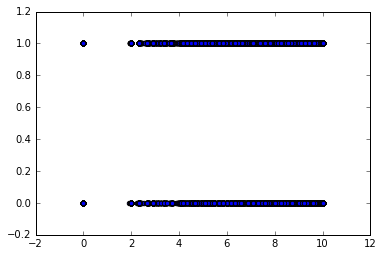

In [9]:
x= 'firstProblemGrade'
y= 'watchedAllVideosBeforeFirstProblem'

plt.scatter(df[x],df[y])